# Chapter 6: How to clean the data

In [7]:
!conda install xlrd

^C


In [1]:
import pandas as pd

## What the info() method can tell you

In [5]:
polls = pd.read_csv('../../data/president_polls_2016.csv')

In [3]:
polls.info(verbose=True, memory_usage='deep', show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12624 entries, 0 to 12623
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cycle             12624 non-null  int64  
 1   branch            12624 non-null  object 
 2   type              12624 non-null  object 
 3   matchup           12624 non-null  object 
 4   forecastdate      12624 non-null  object 
 5   state             12624 non-null  object 
 6   startdate         12624 non-null  object 
 7   enddate           12624 non-null  object 
 8   pollster          12624 non-null  object 
 9   grade             11337 non-null  object 
 10  samplesize        12621 non-null  float64
 11  population        12624 non-null  object 
 12  poll_wt           12624 non-null  float64
 13  rawpoll_clinton   12624 non-null  float64
 14  rawpoll_trump     12624 non-null  float64
 15  rawpoll_johnson   8397 non-null   float64
 16  rawpoll_mcmullin  90 non-null     float6

In [2]:
# NOTE: This may take a long time to run
jobs = pd.read_excel('../../data/oesm18all/all_data_M_2018.xlsx')

In [3]:
jobs.info(verbose=True, memory_usage='deep', show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403895 entries, 0 to 403894
Data columns (total 30 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   area          403895 non-null  int64 
 1   area_title    403895 non-null  object
 2   area_type     403895 non-null  int64 
 3   naics         403895 non-null  object
 4   naics_title   403895 non-null  object
 5   i_group       403895 non-null  object
 6   own_code      403895 non-null  int64 
 7   occ_code      403895 non-null  object
 8   occ_title     403895 non-null  object
 9   o_group       403895 non-null  object
 10  tot_emp       403895 non-null  object
 11  emp_prse      403895 non-null  object
 12  jobs_1000     227944 non-null  object
 13  loc_quotient  227944 non-null  object
 14  pct_total     169080 non-null  object
 15  h_mean        403895 non-null  object
 16  a_mean        403895 non-null  object
 17  mean_prse     403895 non-null  object
 18  h_pct10       403895 non

## What the unique values can tell you

In [6]:
polls.nunique()

cycle                   1
branch                  1
type                    3
matchup                 1
forecastdate            1
state                  57
startdate             352
enddate               345
pollster              196
grade                  10
samplesize           1766
population              4
poll_wt              4399
rawpoll_clinton      1312
rawpoll_trump        1385
rawpoll_johnson       584
rawpoll_mcmullin       16
adjpoll_clinton     12569
adjpoll_trump       12582
adjpoll_johnson      6629
adjpoll_mcmullin       57
multiversions           1
url                  1304
poll_id              4208
question_id          4208
createddate           222
timestamp               3
dtype: int64

In [13]:
polls.apply(pd.unique)

cycle                                                          [2016]
branch                                                    [President]
type                               [polls-plus, now-cast, polls-only]
matchup                               [Clinton vs. Trump vs. Johnson]
forecastdate                                                [11/8/16]
state               [U.S., New Mexico, Virginia, Iowa, Wisconsin, ...
startdate           [11/3/2016, 11/1/2016, 11/2/2016, 11/4/2016, 1...
enddate             [11/6/2016, 11/7/2016, 11/5/2016, 11/4/2016, 1...
pollster            [ABC News/Washington Post, Google Consumer Sur...
grade                       [A+, B, A-, B-, A, nan, B+, C+, C-, C, D]
samplesize          [2220.0, 26574.0, 2195.0, 3677.0, 16639.0, 129...
population                                             [lv, rv, a, v]
poll_wt             [8.720654, 7.628472, 6.424334, 6.087135, 5.316...
rawpoll_clinton     [47.0, 38.03, 42.0, 45.0, 48.0, 44.0, 46.0, 41...
rawpoll_trump       

## What the value counts can tell you

In [8]:
polls.state.value_counts().head(4)

U.S.              3318
Florida            444
North Carolina     375
Pennsylvania       375
Name: state, dtype: int64

In [9]:
polls.state.value_counts(normalize=True).head(4)

U.S.              0.262833
Florida           0.035171
North Carolina    0.029705
Pennsylvania      0.029705
Name: state, dtype: float64

In [10]:
polls.multiversions.value_counts(dropna=False)

NaN    12588
*         36
Name: multiversions, dtype: int64

In [14]:
polls[['state','grade']].value_counts(normalize=True)

state          grade
U.S.           A-       0.107171
               C+       0.048161
               B        0.014289
               C-       0.011114
               A+       0.010056
                          ...   
Nebraska CD-1  B        0.000265
Indiana        A        0.000265
Nebraska CD-2  B        0.000265
Missouri       A        0.000265
Mississippi    C        0.000265
Length: 321, dtype: float64

## How to drop rows

In [15]:
polls.type.value_counts(normalize=1)

polls-plus    0.333333
now-cast      0.333333
polls-only    0.333333
Name: type, dtype: float64

In [16]:
polls = polls.query('type == "now-cast"')

In [17]:
import sqlite3
fires_con = sqlite3.connect('../../data/Data/FPA_FOD_20170508.sqlite')
fires = pd.read_sql_query(
    '''SELECT STATE, FIRE_YEAR, DATETIME(DISCOVERY_DATE) AS DISCOVERY_DATE,
              FIRE_NAME, FIRE_SIZE, LATITUDE, LONGITUDE
       FROM Fires''', fires_con)
fires.columns = fires.columns.str.lower()

In [22]:
len(fires)

1880465

In [21]:
len(fires[fires.duplicated(keep=False)])

3616

In [23]:
fires.drop_duplicates(keep='first', inplace=True)
len(fires)

1878537

## How to drop columns

In [25]:
len(polls.nunique())

27

In [ ]:
#polls = polls.drop(columns=['cycle','forecastdate'])

In [26]:
polls.drop(columns=['cycle','forecastdate'], errors='raise', inplace=True)
len(polls.nunique())

25

## How to rename columns

In [36]:
def show_cols(indf):
    return ", ".join(list(indf.columns))

In [30]:
polls = polls.rename(columns={
    'rawpoll_clinton':'clinton_pct',
    'rawpoll_trump':'trump_pct'})

In [ ]:
polls_names_dict = {'rawpoll_clinton':'clinton_pct',
                    'rawpoll_trump':'trump_pct'}
polls.rename(columns = polls_names_dict, inplace = True)

In [32]:
polls.columns = polls.columns.str.replace('_pct','')

In [39]:
show_cols(jobs)

'area, area_title, area_type, naics, naics_title, i_group, own_code, occ_code, occ_title, o_group, tot_emp, emp_prse, jobs_1000, loc_quotient, pct_total, hourly_mean, annual_mean, mean_prse, hourly_percent10, hourly_percent25, hourly_median, hourly_percent75, hourly_percent90, annual_percent10, annual_percent25, annual_median, annual_percent75, annual_percent90, annual, hourly'

In [38]:
jobs.columns = jobs.columns \
    .str.replace('^a_','annual_') \
    .str.replace('^h_','hourly_') \
    .str.replace('_pct','_percent')

C:\Users\andre\AppData\Local\Temp/ipykernel_108736/977832008.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  jobs.columns = jobs.columns \


## How to find missing values

In [51]:
mortality_data = pd.read_csv('mortality_missing_values.csv')

In [41]:
mortality_data.head(5)

,Year,AgeGroup,DeathRate
0,1900.0,01-04 Years,1983.8
1,NaN,01-04 Years,1695.0
2,1902.0,01-04 Years,NaN
3,1903.0,01-04 Years,1542.1
4,NaN,01-04 Years,NaN


In [42]:
mortality_data.loc[5:9]

,Year,AgeGroup,DeathRate
5,1905.0,01-04 Years,1498.9
6,NaN,01-04 Years,NaN
7,1907.0,01-04 Years,NaN
8,1908.0,01-04 Years,1396.8
9,1909.0,01-04 Years,1348.9


In [43]:
mortality_data.shape

(476, 3)

In [44]:
 mortality_data.count()

Year         473
AgeGroup     476
DeathRate    472
dtype: int64

In [45]:
missing_count = mortality_data.shape[0] - mortality_data.count()
print(missing_count)

Year         3
AgeGroup     0
DeathRate    4
dtype: int64


In [46]:
mortality_data[mortality_data.isnull().any(axis=1)]

,Year,AgeGroup,DeathRate
1,NaN,01-04 Years,1695.0
2,1902.0,01-04 Years,NaN
4,NaN,01-04 Years,NaN
6,NaN,01-04 Years,NaN
7,1907.0,01-04 Years,NaN


In [47]:
mortality_data[mortality_data.DeathRate.isnull()]

,Year,AgeGroup,DeathRate
2,1902.0,01-04 Years,NaN
4,NaN,01-04 Years,NaN
6,NaN,01-04 Years,NaN
7,1907.0,01-04 Years,NaN


In [48]:
mortality_data[mortality_data.DeathRate.notnull()]

,Year,AgeGroup,DeathRate
0,1900.0,01-04 Years,1983.8
1,NaN,01-04 Years,1695.0
3,1903.0,01-04 Years,1542.1
5,1905.0,01-04 Years,1498.9
8,1908.0,01-04 Years,1396.8
...,...,...,...
471,2014.0,15-19 Years,45.5
472,2015.0,15-19 Years,48.3
473,2016.0,15-19 Years,51.2
474,2017.0,15-19 Years,51.5


## How to drop rows with missing values

In [50]:
mortality_data.shape

(471, 3)

In [49]:
mortality_data = mortality_data.dropna()
mortality_data.head()

,Year,AgeGroup,DeathRate
0,1900.0,01-04 Years,1983.8
3,1903.0,01-04 Years,1542.1
5,1905.0,01-04 Years,1498.9
8,1908.0,01-04 Years,1396.8
9,1909.0,01-04 Years,1348.9


In [52]:
mortality_data.dropna(thresh=2, inplace=True)
mortality_data.shape

(474, 3)

In [53]:
mortality_data.dropna(subset=['DeathRate'], inplace=True)
mortality_data.shape

(472, 3)

## How to fill missing values

In [58]:
mortality_data = pd.read_csv('mortality_missing_values.csv')
mortality_data.head()

,Year,AgeGroup,DeathRate
0,1900.0,01-04 Years,1983.8
1,NaN,01-04 Years,1695.0
2,1902.0,01-04 Years,NaN
3,1903.0,01-04 Years,1542.1
4,NaN,01-04 Years,NaN


In [55]:
# control with NaN
mortality_data.DeathRate.describe()

count     472.000000
mean      181.221186
std       265.215427
min        11.400000
25%        40.500000
50%        88.400000
75%       219.675000
max      1983.800000
Name: DeathRate, dtype: float64

In [60]:
# after - median
mortality_data.DeathRate.describe()

count     476.000000
mean      180.441176
std       264.232543
min        11.400000
25%        40.575000
50%        88.400000
75%       218.925000
max      1983.800000
Name: DeathRate, dtype: float64

In [59]:
mortality_data.DeathRate.fillna(value=mortality_data.DeathRate.median(), inplace=True)
mortality_data.head(4)

,Year,AgeGroup,DeathRate
0,1900.0,01-04 Years,1983.8
1,NaN,01-04 Years,1695.0
2,1902.0,01-04 Years,88.4
3,1903.0,01-04 Years,1542.1


In [62]:
# mean      181.221186
# std       265.215427
# 50%        88.400000
mortality_data = pd.read_csv('mortality_missing_values.csv')
mortality_data.fillna(method = 'bfill', limit=2, inplace=True)
# after - median
mortality_data.DeathRate.describe()

count     476.000000
mean      191.955882
std       288.803175
min        11.400000
25%        40.575000
50%        89.500000
75%       222.575000
max      1983.800000
Name: DeathRate, dtype: float64

In [63]:
# mean      181.221186
# std       265.215427
# 50%        88.400000
mortality_data = pd.read_csv('mortality_missing_values.csv')
mortality_data = mortality_data.interpolate()
mortality_data.DeathRate.describe()

count     476.000000
mean      192.376366
std       290.695716
min        11.400000
25%        40.575000
50%        89.500000
75%       222.575000
max      1983.800000
Name: DeathRate, dtype: float64

## How to find date and number columns that are imported as objects

In [68]:
polls.select_dtypes('object').head(2)

,branch,type,matchup,state,pollster,grade,population,multiversions,url
4208,President,now-cast,Clinton vs. Trump vs. Johnson,U.S.,ABC News/Washington Post,A+,lv,NaN,https://www.washingtonpost.com/news/the-fix/wp...
4209,President,now-cast,Clinton vs. Trump vs. Johnson,U.S.,Google Consumer Surveys,B,lv,NaN,https://datastudio.google.com/u/0/#/org//repor...


In [65]:
jobs.select_dtypes('object').head(2)

,area_title,naics,naics_title,i_group,occ_code,occ_title,o_group,tot_emp,emp_prse,jobs_1000,...,hourly_median,hourly_percent75,hourly_percent90,annual_percent10,annual_percent25,annual_median,annual_percent75,annual_percent90,annual,hourly
0,U.S.,000000,Cross-industry,cross-industry,00-0000,All Occupations,total,144733270,0.1,NaN,...,18.58,30.06,47.31,20690,25740,38640,62510,98410,NaN,NaN
1,U.S.,000000,Cross-industry,cross-industry,11-0000,Management Occupations,major,7616650,0.2,NaN,...,50.11,72.93,#,49260,70880,104240,151700,#,NaN,NaN


## How to convert date and time strings to the datetime data type

In [66]:
date_cols = ['startdate','enddate','createddate','timestamp']
polls[date_cols].head(2)

,startdate,enddate,createddate,timestamp
4208,11/3/2016,11/6/2016,11/7/16,09:24:53 8 Nov 2016
4209,11/1/2016,11/7/2016,11/7/16,09:24:53 8 Nov 2016


In [67]:
polls[date_cols] = polls[date_cols].apply(pd.to_datetime)
polls[date_cols].head(2)

,startdate,enddate,createddate,timestamp
4208,2016-11-03,2016-11-06,2016-11-07,2016-11-08 09:24:53
4209,2016-11-01,2016-11-07,2016-11-07,2016-11-08 09:24:53


In [71]:
polls[date_cols].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4208 entries, 4208 to 8415
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   startdate    4208 non-null   object        
 1   enddate      4208 non-null   object        
 2   createddate  4208 non-null   datetime64[ns]
 3   timestamp    4208 non-null   datetime64[ns]
dtypes: datetime64[ns](2), object(2)
memory usage: 164.4+ KB


In [70]:
polls['startdate'] = polls.startdate.dt.strftime("%m/%d/%Y")
polls['enddate'] = polls.enddate.dt.strftime("%m-%d-%y")
polls[date_cols].head(2)

,startdate,enddate,createddate,timestamp
4208,11/03/2016,11-06-16,2016-11-07,2016-11-08 09:24:53
4209,11/01/2016,11-07-16,2016-11-07,2016-11-08 09:24:53


## How to convert object columns to numeric data types

In [ ]:
# pd.to_numeric(jobs.tot_emp)

In [72]:
jobs.tot_emp.tail(3)

403892    170
403893    130
403894     **
Name: tot_emp, dtype: object

In [73]:
pd.to_numeric(jobs.tot_emp, errors='coerce').tail(3)

403892    170.0
403893    130.0
403894      NaN
Name: tot_emp, dtype: float64

## How to work with the category data type

In [83]:
fires[["state"]].value_counts()

state
CA       189516
GA       168693
TX       142017
NC       111277
FL        90261
SC        81290
NY        80395
MS        79230
AZ        71586
AL        66430
OR        61088
MN        44764
OK        43234
MT        40766
NM        37478
ID        36697
CO        34024
WA        33510
WI        31846
AR        31650
TN        31153
SD        30963
UT        30725
LA        30000
KY        27089
NJ        25839
WV        21964
VA        21816
PR        21506
MO        17934
NV        16956
ND        15201
WY        14166
ME        13145
AK        12843
MI        10495
HI         9892
PA         8712
NE         7973
KS         7673
CT         4892
IA         4128
MD         3621
OH         3479
MA         2578
NH         2446
IL         2325
IN         2098
RI          480
VT          456
DE          171
DC           66
dtype: int64

In [81]:
fires.state = fires.state.astype('category')

In [82]:
fires.head(10)

,state,fire_year,discovery_date,fire_name,fire_size,latitude,longitude
0,CA,2005,2005-02-02 00:00:00,FOUNTAIN,0.10,40.036944,-121.005833
1,CA,2004,2004-05-12 00:00:00,PIGEON,0.25,38.933056,-120.404444
2,CA,2004,2004-05-31 00:00:00,SLACK,0.10,38.984167,-120.735556
3,CA,2004,2004-06-28 00:00:00,DEER,0.10,38.559167,-119.913333
4,CA,2004,2004-06-28 00:00:00,STEVENOT,0.10,38.559167,-119.933056
5,CA,2004,2004-06-30 00:00:00,HIDDEN,0.10,38.635278,-120.103611
6,CA,2004,2004-07-01 00:00:00,FORK,0.10,38.688333,-120.153333
7,CA,2005,2005-03-08 00:00:00,SLATE,0.80,40.968056,-122.433889
8,CA,2005,2005-03-15 00:00:00,SHASTA,1.00,41.233611,-122.283333
9,CA,2004,2004-07-01 00:00:00,TANGLEFOOT,0.10,38.548333,-120.149167


In [84]:
statCounts = pd.read_stata('../../data/GSS7218_R3.DTA', columns=['year','wrkstat'])

In [85]:
filteredStatCounts = statCounts.query(
    'wrkstat in ["working fulltime","working parttime","retired"]')
filteredStatCounts.wrkstat.value_counts()

working fulltime    31892
retired              9121
working parttime     6719
temp not working        0
unempl, laid off        0
school                  0
keeping house           0
other                   0
Name: wrkstat, dtype: int64

In [86]:
# produces a warning that you'll learn about in chapter 7
filteredStatCounts['wrkstat'] = \
    filteredStatCounts.wrkstat.cat.remove_unused_categories()
filteredStatCounts.wrkstat.value_counts()

C:\Users\andre\AppData\Local\Temp/ipykernel_108736/410107918.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filteredStatCounts['wrkstat'] = \


working fulltime    31892
retired              9121
working parttime     6719
Name: wrkstat, dtype: int64

## How to replace invalid values and convert a column’s data type

In [87]:
import numpy as np
jobs.tot_emp.replace(to_replace=['*','**'], value=[np.nan,np.nan]) # ,inplace=True)

0         144733270.0
1           7616650.0
2           2535640.0
3            195530.0
4            195530.0
             ...     
403890           40.0
403891          170.0
403892          170.0
403893          130.0
403894            NaN
Name: tot_emp, Length: 403895, dtype: float64

In [93]:
replace_dict = {"to_replace":{'*':np.nan, '**':np.nan}, "inplace":True}
jobs.tot_emp.replace(**replace_dict)

In [89]:
jobs.tot_emp.replace({'*':np.nan, '**':np.nan}, inplace=True)

In [95]:
len(jobs)

403895

In [124]:
unique_hm = [x for x in  list(pd.unique(jobs.hourly_median))]
[u.isnumeric() for u in unique_hm]

AttributeError: 'float' object has no attribute 'isnumeric'

In [125]:
len(jobs.query("hourly_median=='#' or hourly_median=='*'"))

23084

In [138]:
jobs_hmean = jobs.query("hourly_median=='#' or hourly_median=='*'")
pd.to_numeric(jobs_hmean.hourly_median, errors='coerce')

Series([], Name: hourly_median, dtype: float64)

In [141]:
#jobs_hmean = jobs.query("hourly_median!='#'")
#jobs_hmean["int_hourly_median"]= jobs.hourly_median.astype(float)
jobs_hmean.hourly_median.describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: hourly_median, dtype: float64

In [128]:
jobs.hourly_median = jobs.hourly_median.replace(to_replace='*', value = 100)

In [129]:
jobs.hourly.replace(to_replace=np.nan, value=False, inplace=True)

## How to fix data type problems when you import the data

In [131]:
date_cols = ['forecastdate','startdate','enddate','createddate','timestamp']

In [132]:
polls = pd.read_csv('../../data/president_polls_2016.csv')
polls[date_cols].head(3)

,forecastdate,startdate,enddate,createddate,timestamp
0,11/8/16,11/3/2016,11/6/2016,11/7/16,09:35:33 8 Nov 2016
1,11/8/16,11/1/2016,11/7/2016,11/7/16,09:35:33 8 Nov 2016
2,11/8/16,11/2/2016,11/6/2016,11/8/16,09:35:33 8 Nov 2016


In [137]:
polls_new[date_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12624 entries, 0 to 12623
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   forecastdate  12624 non-null  datetime64[ns]
 1   startdate     12624 non-null  datetime64[ns]
 2   enddate       12624 non-null  datetime64[ns]
 3   createddate   12624 non-null  datetime64[ns]
 4   timestamp     12624 non-null  datetime64[ns]
dtypes: datetime64[ns](5)
memory usage: 493.2 KB


In [135]:
polls_new = pd.read_csv('../../data/president_polls_2016.csv', parse_dates=date_cols)
polls_new[date_cols].head(3)

,forecastdate,startdate,enddate,createddate,timestamp
0,2016-11-08,2016-11-03,2016-11-06,2016-11-07,2016-11-08 09:35:33
1,2016-11-08,2016-11-01,2016-11-07,2016-11-07,2016-11-08 09:35:33
2,2016-11-08,2016-11-02,2016-11-06,2016-11-08,2016-11-08 09:35:33


## How to find outliers

In [142]:
mortality_data = pd.read_pickle('mortality_cleaned.pkl')

In [143]:
mortality_group = mortality_data.query('AgeGroup == "15-19 Years"')
mortality_group.head(3)

,Year,AgeGroup,DeathRate
357,1900,15-19 Years,484.8
358,1901,15-19 Years,454.4
359,1902,15-19 Years,421.5


In [144]:
# save DataFrame for later use
mortality_group.to_pickle('mortality_group.pkl')

In [145]:
mortality_group.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,119.0,1959.00000,34.496377,1900.0,1929.50,1959.0,1988.50,2018.0
DeathRate,119.0,177.37479,138.362290,44.8,85.45,106.9,283.65,777.4


<AxesSubplot:xlabel='Year'>

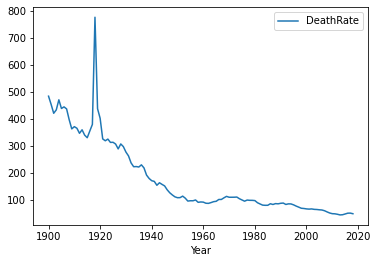

In [146]:
mortality_group.plot(x='Year', y='DeathRate')

<AxesSubplot:xlabel='Year'>

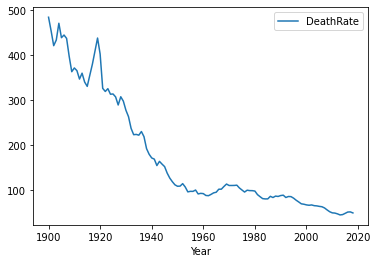

In [149]:
mortality_group.query('DeathRate < 500').plot(x='Year', y='DeathRate')

## How to fix outliers

<AxesSubplot:xlabel='Year'>

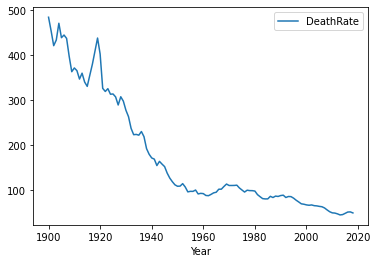

In [152]:
mortality_group = pd.read_pickle('mortality_group.pkl')

mortality_group = mortality_group.query('DeathRate <= 500')
mortality_group.plot(x='Year', y='DeathRate')

<AxesSubplot:xlabel='Year'>

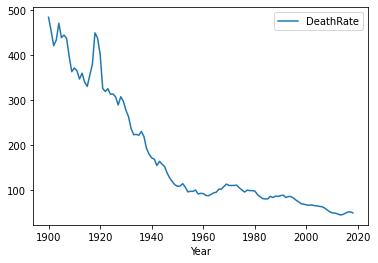

In [153]:
mortality_group = pd.read_pickle('mortality_group.pkl')

mortality_group.loc[mortality_group.DeathRate > 500, 'DeathRate'] = 450
mortality_group.plot(x='Year', y='DeathRate')

<AxesSubplot:xlabel='Year'>

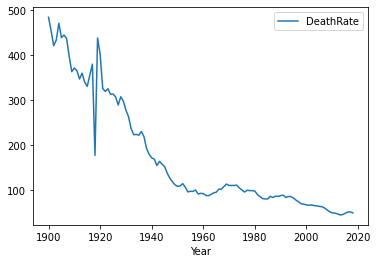

In [154]:
mortality_group = pd.read_pickle('mortality_group.pkl')

mortality_group.loc[mortality_group.DeathRate > 500, 'DeathRate'] \
    = mortality_group.DeathRate.mean()
mortality_group.plot(x='Year', y='DeathRate')

<AxesSubplot:xlabel='Year'>

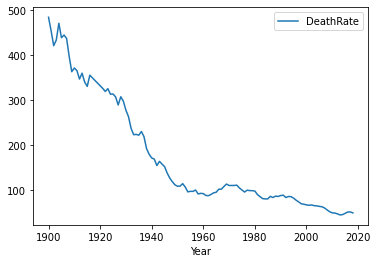

In [155]:
mortality_group = pd.read_pickle('mortality_group.pkl')

mortality_group.loc[mortality_group.Year.isin([1917,1918,1919,1920]),
                    'DeathRate'] = None
mortality_group = mortality_group.interpolate()
mortality_group.plot(x='Year', y='DeathRate')